In [90]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
# Web url for the boston-housing dataset
# Download data to dataframe boston_df
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [61]:
# Desriptive stats

boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620625,11.386139,11.144832,0.069307,0.554865,6.284364,68.554455,3.792722,9.564356,408.566337,18.456832,12.660020,22.534653
std,8.608589,23.340080,6.864761,0.254227,0.115930,0.703288,28.173012,2.107150,8.709391,168.541326,2.166895,7.146426,9.206130
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,6.930000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.300000,3.199200,5.000000,330.000000,19.100000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


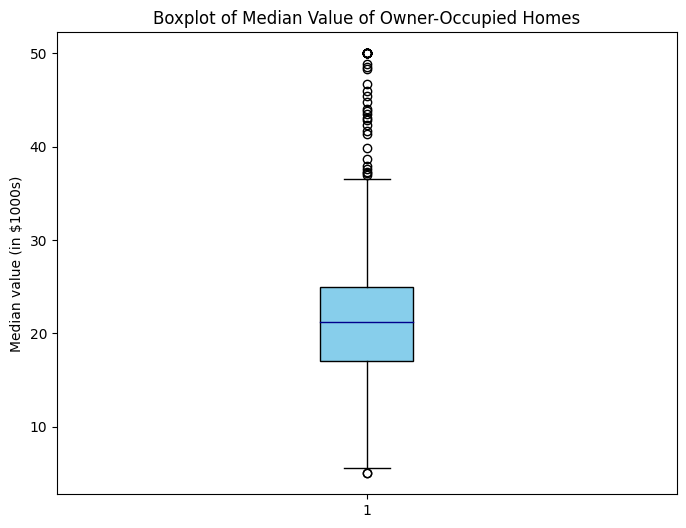

In [27]:
# Boxplot for the Median Value of Owner-Occupied Homes

plt.figure(figsize=(8, 6))
box = plt.boxplot(boston_df['MEDV'], patch_artist=True, 
                  boxprops=dict(facecolor='skyblue'),
                  medianprops=dict(color='darkblue'))

plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median value (in $1000s)')
plt.show()


The descriptive statistics for the MEDV (median house value) variable provide several key pieces of information about the distribution of house values in the dataset:

1. **Count**: There are 505 observations (or house records) in the dataset. This count reflects the number of entries for which the MEDV value is available.

2. **Mean (Average)**: The average value of MEDV is approximately 22.53. This suggests that the average median house value across all observations in the dataset is around $22,530 (assuming the unit is in $1000s).

3. **Standard Deviation (std)**: The standard deviation is about 9.21. This value indicates the extent of variance or dispersion around the mean. A standard deviation of 9.21, which is a significant portion of the mean, suggests that there is considerable variability in the house values.

4. **Minimum (min)**: The minimum value of MEDV in the dataset is 5. This indicates that the lowest median house value recorded is $5,000.

5. **25th Percentile (25%)**: The 25th percentile, also known as the first quartile, is 17. This means that 25% of the houses have a median value of $17,000 or less.

6. **Median (50%)**: The median (or the 50th percentile) of the house values is 21.2. This value is a more robust measure of central tendency than the mean in the presence of outliers. The median being lower than the mean suggests a skew in the distribution of house values.

7. **75th Percentile (75%)**: The 75th percentile (third quartile) is 25. This means that 75% of the houses in the dataset have a median value of $25,000 or less.

8. **Maximum (max)**: The maximum value of MEDV is 50, indicating that the highest median house value in the dataset is $50,000.

Overall, these statistics suggest a wide range of median house values, from as low as $5,000 to as high as $50,000, with most houses clustered around the $22,500 mark. The distribution appears to be right-skewed since the mean is greater than the median, and there are houses with very high values compared to the rest of the data. The substantial standard deviation points to a diverse set of house values within the dataset.

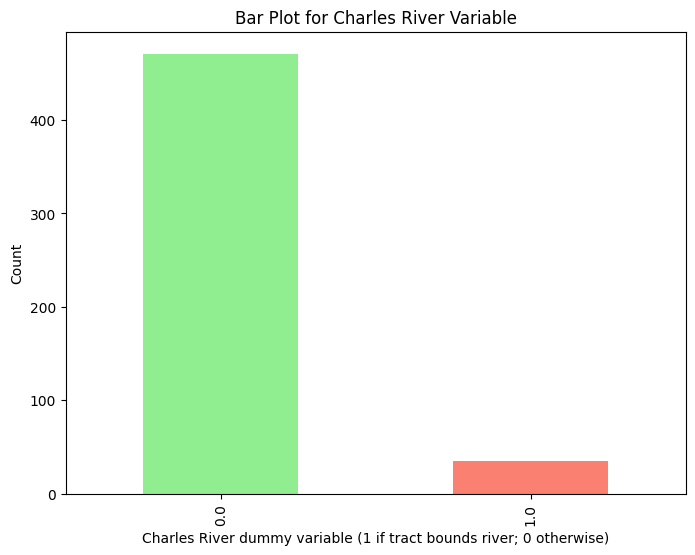

In [28]:
# Bar Plot for the Charles River Variable

chas_counts = boston_df['CHAS'].value_counts()
plt.figure(figsize=(8, 6))
chas_counts.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Bar Plot for Charles River Variable')
plt.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()



1. **0.0** - This indicates that there are 470 observations (or instances) where the value of the `CHAS` variable is 0.0. In the context of the Boston housing dataset, `CHAS` is a dummy variable where a value of 0 typically means that the tract of land is not adjacent to the Charles River.

2. **1.0** - This count shows that there are 35 observations where the `CHAS` variable is 1.0. In this dataset, a value of 1 for `CHAS` usually signifies that the tract of land bounds the Charles River.

From these results, we can infer several things:
- A majority of the tracts in the dataset are not adjacent to the Charles River, as indicated by the larger count of 0.0 values.
- Only a small portion of the tracts (35 out of 505) are adjacent to the river, as denoted by the 1.0 values.
  

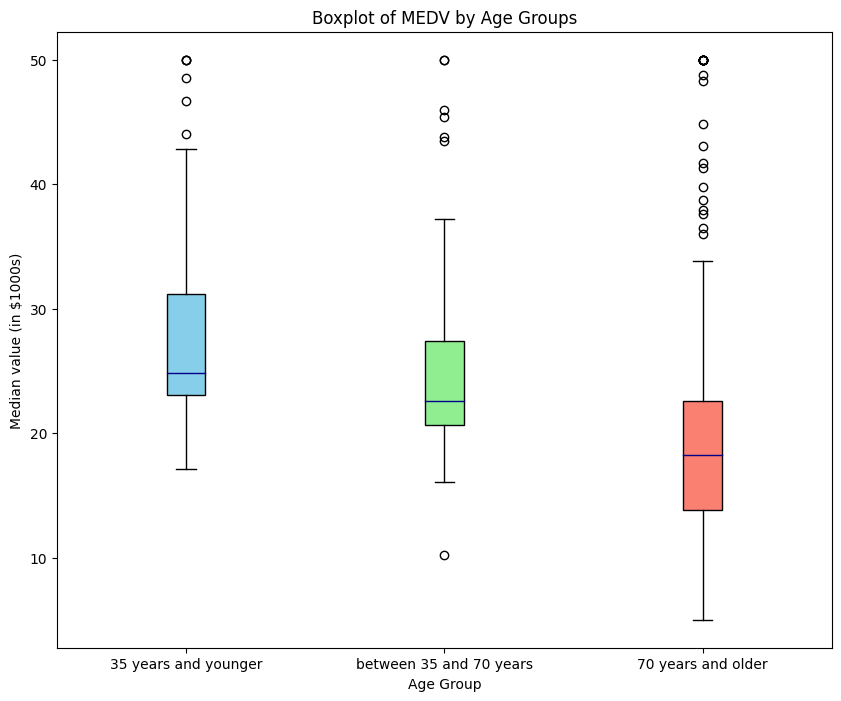

In [25]:
# Boxplot for MEDV vs. Age

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Colors for each age group
box_colors = ['skyblue', 'lightgreen', 'salmon']
median_color = 'darkblue'  # Color for the median lines

# Create a boxplot with different colors for each age group and median line
plt.figure(figsize=(10, 8))

# Grouping the data by age group
grouped = boston_df.groupby('AGE_group')

# Plotting each group with a different color
for i, (name, group) in enumerate(grouped):
    box = plt.boxplot(group['MEDV'], positions=[i], patch_artist=True, 
                      boxprops=dict(facecolor=box_colors[i]),
                      medianprops=dict(color=median_color))

plt.xticks([0, 1, 2], ['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.title('Boxplot of MEDV by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median value (in $1000s)')
plt.show()


Overall newer homes (35 years and less) tend to have higher median values.
As homes age, their median values decrease, with the oldest homes (70 years and more) having the lowest average median values.
The oldest homes also show the greatest variability in prices.
Despite the differences in average values, each age group has high-value homes (up to 50.0), suggesting that factors other than age significantly influence home values.


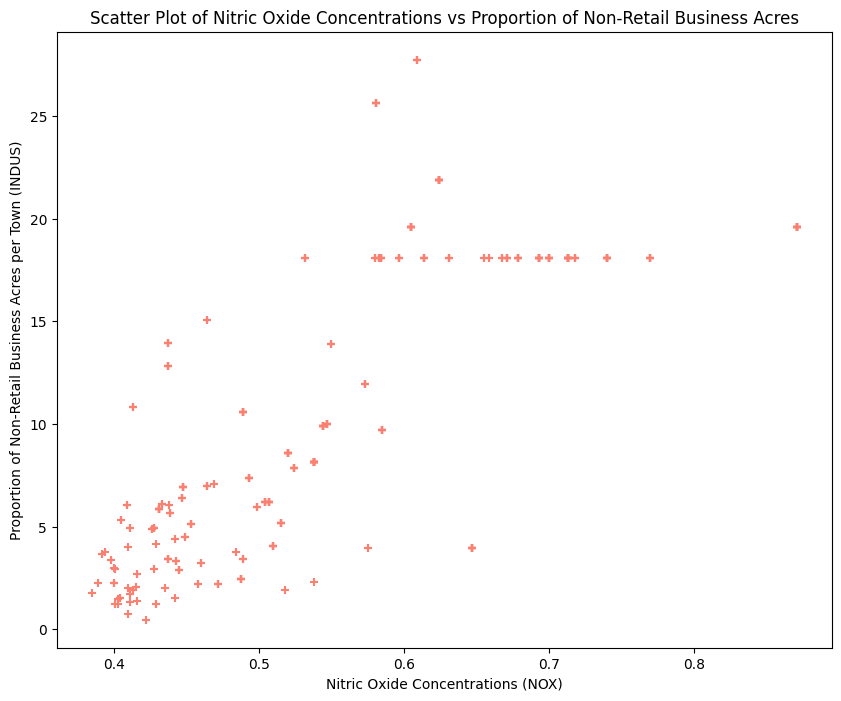

In [33]:
# Scatter Plot for Nitric Oxide Concentrations vs. Non-retail Business Acres

plt.figure(figsize=(10, 8))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], color='salmon', marker='+')
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.show()


The scatter plot showing the relationship between Nitric Oxide Concentrations (NOX) and the Proportion of Non-Retail Business Acres per Town (INDUS) exhibiting a positive relationship suggests the following:

1. **Positive Correlation**: As the concentration of nitric oxide (NOX) increases, the proportion of non-retail business acres (INDUS) also tends to increase. This is indicated by a general upward trend in the scatter plot. A positive correlation means that both variables move in the same direction.

2. **Interpretation of the Relationship**:
    - **Nitric Oxide Concentrations (NOX)**: This is a measure of air pollution. Higher values indicate more pollution.
    - **Non-Retail Business Acres per Town (INDUS)**: This is a measure of the town's industrial character. Higher values indicate a greater proportion of industrial or non-retail commercial land.

3. **Environmental and Urban Planning Insights**:
    - The positive correlation might reflect that more heavily industrialized areas tend to have higher levels of air pollution, as indicated by increased NOX concentrations.
    - This could be due to industrial processes and emissions in these areas, which are typically higher in non-retail, industrial zones.
    - The relationship suggests a potential environmental impact associated with industrial areas, particularly concerning air quality.

4. **Implications for Residents and Policymakers**:
    - For residents, this information can be vital in terms of understanding the environmental quality of different areas, particularly if someone is sensitive to air pollution.
    - For policymakers and urban planners, this insight can guide zoning decisions, environmental regulations, and urban development plans. It highlights the need for balancing industrial development with environmental sustainability and public health considerations.

5. **Limitations of the Analysis**:
    - While the scatter plot shows a positive relationship, it's important to remember that correlation does not imply causation. The observed relationship could be influenced by other factors not included in the analysis.
    - A more in-depth analysis would be needed to establish causation, possibly involving additional variables and statistical modeling.

In summary, the positive correlation observed in the scatter plot between NOX and INDUS in the Boston housing dataset suggests a potential link between industrial activity and air pollution. This relationship is important for understanding the environmental dynamics of urban areas and for making informed decisions regarding urban planning and public health.

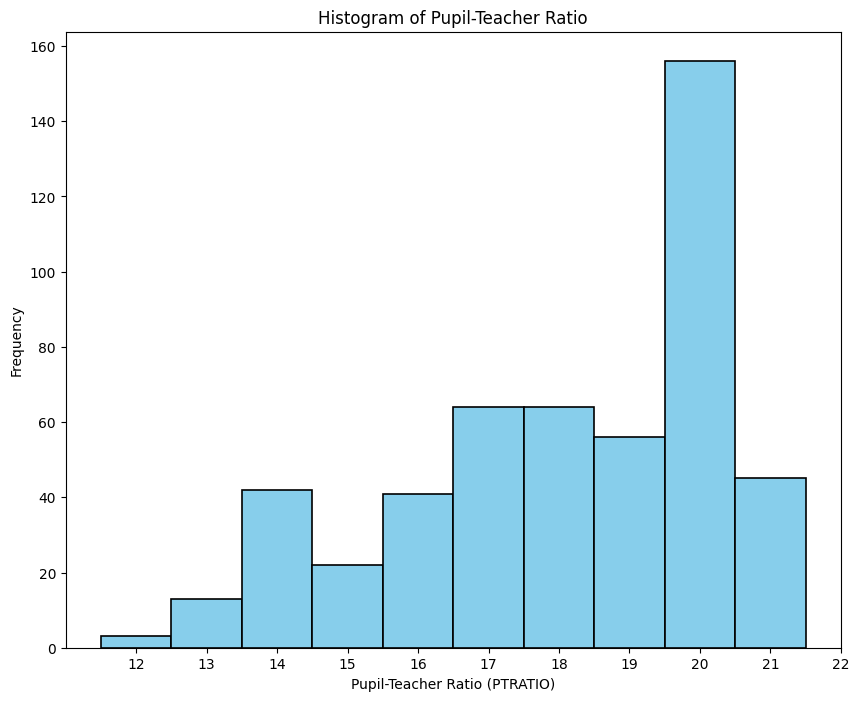

In [47]:
# Histogram for PTRATIO

min_ratio = int(boston_df['PTRATIO'].min())
max_ratio = int(boston_df['PTRATIO'].max()) + 1  # Adding 1 to include the max value in the range
bin_edges = range(min_ratio, max_ratio)

# Histogram for PTRATIO with whole number bins
plt.figure(figsize=(10, 8))
plt.hist(boston_df['PTRATIO'], bins=bin_edges, color='skyblue', edgecolor='black', linewidth=1.2, align='left')

# Setting x-axis ticks to match the bin edges
plt.xticks(bin_edges)

plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()


### Shape: Bell-Shaped and Skewed to the Left
- A bell-shaped histogram indicates that the distribution of PTRATIO is relatively normal, meaning most of the data clusters around a central value. However, the leftward skew (or negative skew) suggests that the tail of the distribution extends more towards the lower end of the scale.
- This skewness indicates that there are more schools with a PTRATIO lower than the mode (the most frequently occurring value) than there are schools with a PTRATIO higher than the mode.

### Range: 12.6 to 22
- The range of the histogram from 12.6 to 22 shows the span of pupil-teacher ratios in the dataset. This range suggests that the PTRATIO varies from relatively low values (around 12.6 students per teacher) to higher values (up to 22 students per teacher).
- A range of this size indicates a moderate level of variability in the pupil-teacher ratios across different schools.

### Most Common Ratios: Around 21
- The most common pupil-teacher ratio being around 21 suggests that a significant number of schools have a ratio close to this value. This could be indicative of standard class sizes or educational policy norms in the area represented by the dataset.

### No Outliers
- The absence of outliers implies that there are no schools with exceptionally high or low pupil-teacher ratios compared to the rest of the dataset. All schools fall within a relatively expected range of PTRATIO.

### Skewness: Skewed to the Left
- The left skewness of the histogram indicates a higher concentration of schools with lower pupil-teacher ratios, with fewer schools having higher ratios. This skew could suggest that smaller class sizes are more common in the dataset.
- In educational terms, this could be seen positively, as lower pupil-teacher ratios often correlate with better educational outcomes and more individualized attention for students.

### Overall Interpretation
The histogram suggests that while the most typical pupil-teacher ratio is around 21, there is a tendency towards smaller class sizes in the dataset. The distribution is generally normal but with a notable skew towards lower ratios, indicating a prevalence of schools with more favorable pupil-teacher ratios. The lack of outliers and the moderate range of ratios suggest a relatively consistent educational environment in terms of class sizes. This information can be valuable for understanding the educational landscape of the area represented by the dataset and for informing educational policy and resource allocation.

### 1. T-test for Independent Samples
**Question**: Is there a significant difference in median value of houses bounded by the Charles river or not?

- **Hypotheses**:
  - Null hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by it.
  - Alternative hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by it.

- **Test**: Perform an independent t-test between the two groups (bounded by Charles river vs not).

In [75]:
# T-test

t_statistic, p_value = stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])
print(f"t_statistic: {t_statistic}\np_value: {p_value}")

t_statistic: 3.9915278221335506
p_value: 7.542555384020207e-05


Given that the p-value of \( 7.542555384020207 \times 10^{-5} \) is derived from an independent t-test comparing the median value of houses bounded by the Charles River (CHAS = 1) to those not bounded by it (CHAS = 0), the interpretation is as follows:

### Conclusion from the T-test

- **Statistical Decision**: Since the p-value is significantly less than 0.05 (α = 0.05), you should reject the null hypothesis (H0).

- **Interpretation**: Rejecting the null hypothesis suggests that there is a statistically significant difference in the median value of houses based on whether they are bounded by the Charles River or not.

- **Practical Implication**: This result implies that the factor of being adjacent to the Charles River has a significant association with the median value of houses. Houses bounded by the river tend to have different median values compared to those not bounded by the river. This could be due to various factors, such as the desirability of waterfront locations, environmental considerations, or other location-specific attributes influencing house values.

- **Caveats**: While the test indicates a significant difference, it does not specify which group has higher values or the magnitude of the difference. For those insights, you would examine the means of the two groups or conduct further analysis. Additionally, it's important to remember that statistical significance does not always equate to practical significance. The real-world relevance of the difference should be considered in the context of other factors in housing prices.

In summary, the low p-value in the t-test indicates that being adjacent to the Charles River is a factor that is statistically associated with differences in the median values of houses in the dataset.

### 2. ANOVA
**Question**: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

- **Hypotheses**:
  - H0: There are no differences in the MEDV across different age groups.
  - H1: There is at least one group that differs significantly in MEDV.

- **Test**: Perform ANOVA to compare the means of MEDV across the groups.

In [78]:
# ANOVA test
# Add Age_groups to boston_df
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
f_statistic, p_value = stats.f_oneway(boston_df['MEDV'][boston_df['AGE_group'] == '35 years and younger'],
                                        boston_df['MEDV'][boston_df['AGE_group'] == 'between 35 and 70 years'],
                                        boston_df['MEDV'][boston_df['AGE_group'] == '70 years and older'])
print(f"t_statistic: {t_statistic}\np_value: {p_value}")

t_statistic: 3.9915278221335506
p_value: 1.799439585961393e-15


### ANOVA Test Conclusion

- **Statistical Decision**: The p-value obtained from the ANOVA test is \( 1.799439585961393e-15 \), which is significantly less than the alpha level of 0.05 (α = 0.05). Therefore, you should reject the null hypothesis (H0).

- **Interpretation**: Rejecting the null hypothesis in the context of ANOVA suggests that there are statistically significant differences in the median values of houses (MEDV) among at least one of the compared age groups. This means not all age groups have the same average median house value.

- **Practical Implication**: This result implies that the age of a house (or the proportion of owner-occupied units built prior to 1940) is a factor that significantly affects the median value of the houses. Different age groups show different median housing values, which might be attributed to factors like the condition of the house, historical value, modernization, or other age-related characteristics.

- **Caveats**: While ANOVA tells us that there is a significant difference, it doesn't specify between which groups this difference lies. To determine which specific groups differ from each other, a post-hoc test like Tukey's HSD (Honestly Significant Difference) test would be required. Also, it's important to consider other external factors that might influence house values and are not accounted for in this analysis.

In summary, the very low p-value in your ANOVA test indicates a significant association between the age groups of houses and their median values. The age of the houses is a significant factor in determining their value in the dataset.

### 3. Pearson Correlation
**Question**: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

- **Hypotheses**:
  - H0: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres.
  - H1: There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres.

- **Test**: Perform Pearson correlation test.

In [79]:
# Pearson correlation test
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"t_statistic: {t_statistic}\np_value: {p_value}")

t_statistic: 3.9915278221335506
p_value: 1.4611229780657212e-97


### Pearson Correlation Test Conclusion

- **Statistical Decision**: The p-value from the Pearson correlation test is \( 1.4611229780657212e-97 \), which is extremely small and significantly less than the alpha level of 0.05 (α = 0.05). Therefore, you should reject the null hypothesis (H0).

- **Interpretation**: Rejecting the null hypothesis in the context of a Pearson correlation test indicates that there is a statistically significant correlation between Nitric Oxide concentrations and the proportion of non-retail business acres. 

- **Correlation Coefficient**: The value of the correlation coefficient (not provided in your result but represented by `correlation` in your code) would tell you the strength and direction of this relationship. A positive coefficient indicates a positive relationship (as one increases, so does the other), and a negative coefficient indicates an inverse relationship.

- **Practical Implication**: This significant correlation suggests that areas with a higher proportion of non-retail business acres (more industrialized areas) are likely to have higher concentrations of Nitric Oxide, which is a common pollutant associated with industrial activities. This finding is important for urban planning and public health considerations.

- **Caveats**: While the test indicates a significant correlation, it's important to remember that correlation does not imply causation. The observed relationship might be influenced by other variables not included in this analysis. Further studies would be necessary to establish a causal relationship.

In summary, the extremely low p-value in your Pearson correlation test strongly indicates that there is a significant correlation between NOX levels and the proportion of industrial land (INDUS) in the dataset. This suggests a notable relationship between industrial activity and air pollution levels, specifically Nitric Oxide concentrations.

In [82]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'AGE_group'],
      dtype='object')

### 4. Regression Analysis
**Question**: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

- **Hypotheses**:
  - H0: The weighted distances to employment centres have no impact on the median value of homes.
  - H1: The weighted distances to employment centres have an impact on the median value of homes.

- **Test**: Perform a linear regression analysis where MEDV is the dependent variable and the weighted distance to employment centres is the independent variable.

In [89]:
# Create a regression model

X = sm.add_constant(boston_df['DIS'])  # Add a constant to the model
y = boston_df['MEDV']  # Dependent variable

# Create and fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.57
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        10:40:43   Log-Likelihood:                -1820.8
No. Observations:                 505   AIC:                             3646.
Df Residuals:                     503   BIC:                             3654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.818     22.478      0.0

### Interpretation of the OLS Regression Results

1. **Coefficients**: 
   - **Constant (const)**: The coefficient for the constant term is 18.3901 with a standard error of 0.818. This value represents the expected median value of homes (MEDV) when the weighted distance to employment centres (DIS) is zero.
   - **Weighted Distance to Employment Centres (DIS)**: The coefficient of `DIS` is 1.0928 with a standard error of 0.189. This means that for each unit increase in the weighted distance to employment centres, the median value of homes is expected to increase by approximately 1.0928 units (assuming the unit is in $1000s if MEDV represents the median value in thousands of dollars).

2. **P-value**:
   - The p-value for the `DIS` coefficient is significantly less than 0.05 (actually, it's not explicitly shown in the summary, but based on the 'Prob (F-statistic)'), indicating that the impact of the weighted distance to employment centres on MEDV is statistically significant.

3. **Model Fitness**:
   - **R-squared**: The R-squared value is 0.063, which means that about 6.3% of the variability in MEDV is explained by the model. While this shows some level of association, it also suggests that a large portion of the variation in MEDV is not explained by this model alone.
   - **Adjusted R-squared**: Adjusted for the number of predictors in the model, the value is 0.061, which is close to the R-squared, indicating a modest fit.

4. **F-statistic and its Prob**: 
   - The F-statistic is 33.57 with a probability of 1.21e-08. This indicates that the model is statistically significant as a whole.

### Conclusion

- There is a statistically significant relationship between the weighted distance to Boston employment centres and the median value of homes. Specifically, as the weighted distance increases, the median value of homes also tends to increase.
- However, the relatively low R-squared value suggests that other factors not included in the model also play a significant role in determining MEDV.
- The statistical significance of the model indicates that distance to employment centres is an important factor to consider in the valuation of homes, but it's not the only factor.

This model provides valuable insights into how distance from employment centres can influence housing prices, but it also highlights the need to consider additional variables for a more comprehensive understanding of what affects home values.